In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss









In [2]:
accident_df = pd.read_csv("Data-Collisions.csv")

/Users/Winnie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
accident_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
accident_df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [6]:
accident_df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [7]:
accident_df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [8]:
accident_df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [9]:
from sklearn.utils import resample
accident_df_1 = accident_df[accident_df["SEVERITYCODE"] == 1]
accident_df_2 = accident_df[accident_df["SEVERITYCODE"] == 2]

accident_df_1_desample = resample(accident_df_1, replace = False, n_samples = 58188, random_state = 123)
balanced_df = pd.concat([accident_df_1_desample,accident_df_2])

balanced_df["SEVERITYCODE"].value_counts()


2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [10]:
#encoding INATTENTIONIND, No = 0, Yes = 1
balanced_df["INATTENTIONIND"].replace("Y", 1, inplace = True)
balanced_df["INATTENTIONIND"].replace(np.nan, 0, inplace = True)

In [11]:
#encoding UNDERINFL, No = 0, Yes = 1
balanced_df["UNDERINFL"].replace("Y", 1, inplace = True)
balanced_df["UNDERINFL"].replace("N", 0, inplace = True)
balanced_df["UNDERINFL"].replace("0", 0, inplace = True)
balanced_df["UNDERINFL"].replace("1", 1, inplace = True)



In [12]:
#encoding WEATHER, Clear = 0, Raining/Snowing = 1, Overcast/Cloudy = 2, Wind related = 3, Unknown/Other = 4
balanced_df["WEATHER"].replace("Clear", 0, inplace = True)
balanced_df["WEATHER"].replace("Raining", 1, inplace = True)
balanced_df["WEATHER"].replace("Overcast", 2, inplace = True)
balanced_df["WEATHER"].replace("Unknown", 4, inplace = True)
balanced_df["WEATHER"].replace("Other", 4, inplace = True)
balanced_df["WEATHER"].replace("Snowing", 1, inplace = True)
balanced_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace = True)
balanced_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 1, inplace = True)
balanced_df["WEATHER"].replace("Severe Crosswind", 3, inplace = True)
balanced_df["WEATHER"].replace("Partly Cloudy", 2, inplace = True)
balanced_df["WEATHER"].replace("Blowing Sand/Dirt", 3, inplace = True)



In [13]:
#encoding SPEEDING, No = 0, Yes = 1
balanced_df["SPEEDING"].replace("Y", 1, inplace = True)
balanced_df["SPEEDING"].replace(np.nan, 0, inplace = True)

In [14]:
#encoding ROADCOND, Wet = 0, Dry = 1, Mudy = 2, Unkown/Other = 3
balanced_df["ROADCOND"].replace("Dry", 1, inplace = True)
balanced_df["ROADCOND"].replace("Wet", 0, inplace = True)
balanced_df["ROADCOND"].replace("Unknown", 3, inplace = True)
balanced_df["ROADCOND"].replace("Ice", 0, inplace = True)
balanced_df["ROADCOND"].replace("Snow/Slush", 2, inplace = True)
balanced_df["ROADCOND"].replace("Other", 3, inplace = True)
balanced_df["ROADCOND"].replace("Standing Water", 0, inplace = True)
balanced_df["ROADCOND"].replace("Sand/Mud/Dirt", 2, inplace = True)
balanced_df["ROADCOND"].replace("Oil", 0, inplace = True)


In [15]:
#encoding LIGHTCOND, Bright = 0, Dark = 1, Medium = 2, Unkown/Other = 3
balanced_df["LIGHTCOND"].replace("Dark - Street Lights On", 2, inplace = True)
balanced_df["LIGHTCOND"].replace("Daylight", 0, inplace = True)
balanced_df["LIGHTCOND"].replace("Unknown", 3, inplace = True)
balanced_df["LIGHTCOND"].replace("Dusk", 2, inplace = True)
balanced_df["LIGHTCOND"].replace("Dawn", 2, inplace = True)
balanced_df["LIGHTCOND"].replace("Dark - No Street Lights", 1, inplace = True)
balanced_df["LIGHTCOND"].replace("Dark - Street Lights Off", 1, inplace = True)
balanced_df["LIGHTCOND"].replace("Other", 3, inplace = True)
balanced_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 1, inplace = True)


In [16]:
#missing data
missing_data = balanced_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    116376
Name: SEVERITYCODE, dtype: int64

X
False    113462
True       2914
Name: X, dtype: int64

Y
False    113462
True       2914
Name: Y, dtype: int64

OBJECTID
False    116376
Name: OBJECTID, dtype: int64

INCKEY
False    116376
Name: INCKEY, dtype: int64

COLDETKEY
False    116376
Name: COLDETKEY, dtype: int64

REPORTNO
False    116376
Name: REPORTNO, dtype: int64

STATUS
False    116376
Name: STATUS, dtype: int64

ADDRTYPE
False    115454
True        922
Name: ADDRTYPE, dtype: int64

INTKEY
True     72626
False    43750
Name: INTKEY, dtype: int64

LOCATION
False    115071
True       1305
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     64773
False    51603
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     113711
False      2665
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    116376
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    116376
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    113666
True       2710
Name: COLLI

In [17]:
#Replace the missing value by frequency
INATTENTIONIND_freq = balanced_df["INATTENTIONIND"].value_counts().idxmax()
balanced_df["INATTENTIONIND"].replace(np.nan, INATTENTIONIND_freq, inplace=True)

In [18]:
UNDERINFL_freq = balanced_df["UNDERINFL"].value_counts().idxmax()
balanced_df["UNDERINFL"].replace(np.nan, UNDERINFL_freq, inplace=True)

In [19]:
WEATHER_freq = balanced_df["WEATHER"].value_counts().idxmax()
balanced_df["WEATHER"].replace(np.nan, WEATHER_freq, inplace=True)

In [20]:
SPEEDING_freq = balanced_df["SPEEDING"].value_counts().idxmax()
balanced_df["SPEEDING"].replace(np.nan, SPEEDING_freq, inplace=True)

In [21]:
LIGHTCOND_freq = balanced_df["LIGHTCOND"].value_counts().idxmax()
balanced_df["LIGHTCOND"].replace(np.nan, LIGHTCOND_freq, inplace=True)

In [22]:
ROADCOND_freq = balanced_df["ROADCOND"].value_counts().idxmax()
balanced_df["ROADCOND"].replace(np.nan, ROADCOND_freq, inplace=True)

In [23]:
balanced_df["ROADCOND"] = balanced_df["ROADCOND"].astype(int)
balanced_df["LIGHTCOND"] = balanced_df["LIGHTCOND"].astype(int)
balanced_df["SPEEDING"] = balanced_df["SPEEDING"].astype(int)
balanced_df["WEATHER"] = balanced_df["WEATHER"].astype(int)
balanced_df["UNDERINFL"] = balanced_df["UNDERINFL"].astype(int)
balanced_df["INATTENTIONIND"] = balanced_df["INATTENTIONIND"].astype(int)

In [24]:
X = balanced_df[["INATTENTIONIND","UNDERINFL", "WEATHER", "LIGHTCOND", "ROADCOND", "SPEEDING"]]
y = balanced_df["SEVERITYCODE"].values


In [25]:
#Normalized the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.43697754, -0.23290562,  0.24429227,  1.18630117, -1.24441844,
        -0.23274155],
       [-0.43697754, -0.23290562, -0.65220614, -0.72997259,  0.1954205 ,
        -0.23274155],
       [-0.43697754, -0.23290562,  2.9337875 ,  2.14443805,  3.07509838,
        -0.23274155],
       ...,
       [-0.43697754, -0.23290562, -0.65220614, -0.72997259,  0.1954205 ,
        -0.23274155],
       [-0.43697754, -0.23290562, -0.65220614, -0.72997259,  0.1954205 ,
        -0.23274155],
       [-0.43697754, -0.23290562, -0.65220614,  1.18630117,  0.1954205 ,
        -0.23274155]])

In [26]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (81463, 6) (81463,)
Test set: (34913, 6) (34913,)


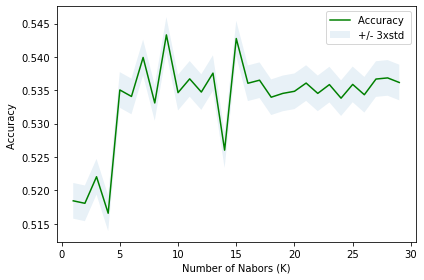

The best accuracy was with 0.5432933291324149 with k= 9


In [27]:
#Build KNN model
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
#plot model accuracy for different k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [28]:
#kNN with k = 9
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))
knn_jaccard = jaccard_score(y_test, yhat_KNN)
knn_f1 = f1_score(y_test, yhat_KNN,average='weighted')
print("Jaccard Index : ",knn_jaccard)
print("F1-score : ",knn_f1)

Train set Accuracy:  0.5475246430895008
Test set Accuracy:  0.5432933291324149
Jaccard Index :  0.4152057507518521
F1-score :  0.5380468915977995


In [29]:
#build Decision Tree
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)
yhat_DecisionTree = Tree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,  yhat_DecisionTree))
Tree_jaccard=jaccard_score(y_test, yhat_DecisionTree)
print("Jaccard Index : ",Tree_jaccard)
Tree_f1=f1_score(y_test, yhat_DecisionTree,average='weighted')
print("F1-score : ",Tree_f1)

DecisionTrees's Accuracy:  0.554177526995675
Jaccard Index :  0.1231973862100045
F1-score :  0.4543195490231845


In [31]:
#build LR model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat_Logistic = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("yhat = ", yhat_Logistic)
print("yhat_prob = ", yhat_prob)

LR_jaccard=jaccard_score(y_test, yhat_Logistic)
print("Jaccard Index : ", LR_jaccard)
yhat_prob = LR.predict_proba(X_test)
LR_f1=f1_score(y_test, yhat_Logistic,average='weighted')
print("F1-score : ",LR_f1)
LR_log_loss=log_loss(y_test, yhat_prob)
print("Log Loss : ",LR_log_loss)

yhat =  [1 2 1 ... 2 2 2]
yhat_prob =  [[0.55998601 0.44001399]
 [0.42161113 0.57838887]
 [0.8427658  0.1572342 ]
 ...
 [0.46271707 0.53728293]
 [0.36808083 0.63191917]
 [0.46271707 0.53728293]]
Jaccard Index :  0.28816837839082576
F1-score :  0.5393203605826873
Log Loss :  0.6695585383316205


In [33]:
df2=pd.DataFrame({'Algorithm':['KNN','Decision Tree','Logistic Regression'],'Jacard':[knn_jaccard,Tree_jaccard,LR_jaccard],'F1-score':[knn_f1,Tree_f1,LR_f1],'LogLoss':['NA','NA',LR_log_loss]})
df2

,Algorithm,Jacard,F1-score,LogLoss
0,KNN,0.415206,0.538047,NA
1,Decision Tree,0.123197,0.454320,NA
2,Logistic Regression,0.288168,0.539320,0.669559
